In [3]:
%matplotlib inline

import tensorflow as tf
import numpy as np
# Keras stuff 
import keras as ks
from keras.layers import Lambda

# read in file

import scipy.signal as signal
from scipy.io import wavfile

#do FFT because indecies will be the same length of the file ??

# Copied from: https://www.kaggle.com/davids1992/speech-representation-and-data-exploration

# Visualization
import matplotlib.pyplot as plt
#import seaborn as sns
import IPython.display as ipd
#import librosa.display

#import plotly.offline as py
#py.init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.tools as tls
import pandas as pd


In [43]:
# read in the data
filepath = "./train/audio"
filename = "/bed/0d2bcf9d_nohash_1.wav"

sample_rate, samples = wavfile.read(filepath + filename)
samplesReshape = np.reshape(samples,(1,samples.shape[0],1))/2000.0

In [6]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

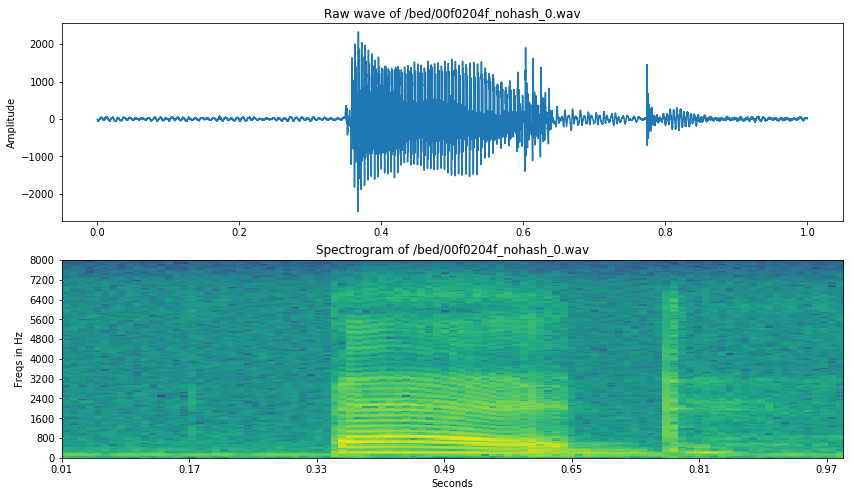

In [7]:
freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

In [8]:
samples.shape
sample_rate

Last_HalfSampleRate = lambda x: x[-int(sample_rate/2):,:]

samplesReshape.shape

(1, 16000, 1)

In [40]:
model = ks.models.Sequential() 
#batch_size = None
steps = sample_rate;
input_dim = 1
ConvLayer1     = ks.layers.Conv1D(1,int(sample_rate/8),input_shape = [steps, input_dim],activation="tanh",padding='Same', strides=4)
ConvLayer2     = ks.layers.Conv1D(1,int(sample_rate/16),activation="tanh",padding='Same', strides=2)
ConvLayer3     = ks.layers.Conv1D(1,int(sample_rate/32),activation="tanh",padding='Same', strides=2)

#LambdaLayer   = Lambda(Last_HalfSampleRate, output_shape= (int(sample_rate),1))

#zero padding 
PaddingLayer = ks.layers.convolutional.ZeroPadding1D(padding = (int(sample_rate/2),0))
ConvLayer4 = ks.layers.Conv1D(1,int(sample_rate/32), padding= 'Same', activation="tanh")
ConvLayer5 = ks.layers.Conv1D(1,int(sample_rate/16), padding= 'Same', activation="tanh")
ConvLayer6 = ks.layers.Conv1D(1,int(sample_rate/8), padding= 'Same', activation="tanh")


UpSampleLayer = ks.layers.convolutional.UpSampling1D(size = 16)

# Down sampling from 16,000 -> 1,000
# Up sampling from 1,000 -> 16,000


model.add(ConvLayer1)
model.add(ConvLayer2)
model.add(ConvLayer3)
#model.add(LambdaLayer)
model.add(UpSampleLayer)
#model.add(PaddingLayer)
model.add(ConvLayer4)
model.add(ConvLayer5)
model.add(ConvLayer6)
model.summary()
model.compile(optimizer='adam' , loss= 'mse')
model.fit(samplesReshape,samplesReshape, epochs=500)


# http://www.deeplearningbook.org/  -- Chapter 9, Read you dumb 


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_70 (Conv1D)           (None, 4000, 1)           2001      
_________________________________________________________________
conv1d_71 (Conv1D)           (None, 2000, 1)           1001      
_________________________________________________________________
conv1d_72 (Conv1D)           (None, 1000, 1)           501       
_________________________________________________________________
up_sampling1d_18 (UpSampling (None, 16000, 1)          0         
_________________________________________________________________
conv1d_73 (Conv1D)           (None, 16000, 1)          501       
_________________________________________________________________
conv1d_74 (Conv1D)           (None, 16000, 1)          1001      
_________________________________________________________________
conv1d_75 (Conv1D)           (None, 16000, 1)          2001      
Total para

1/1 [==============================] - 0s - loss: 0.0050
Epoch 101/500
1/1 [==============================] - 0s - loss: 0.0049
Epoch 102/500
1/1 [==============================] - 0s - loss: 0.0048
Epoch 103/500
1/1 [==============================] - 0s - loss: 0.0047
Epoch 104/500
1/1 [==============================] - 0s - loss: 0.0047
Epoch 105/500
1/1 [==============================] - 0s - loss: 0.0046
Epoch 106/500
1/1 [==============================] - 0s - loss: 0.0045
Epoch 107/500
1/1 [==============================] - 0s - loss: 0.0045
Epoch 108/500
1/1 [==============================] - 0s - loss: 0.0044
Epoch 109/500
1/1 [==============================] - 0s - loss: 0.0044
Epoch 110/500
1/1 [==============================] - 0s - loss: 0.0043
Epoch 111/500
1/1 [==============================] - 0s - loss: 0.0043
Epoch 112/500
1/1 [==============================] - 0s - loss: 0.0042
Epoch 113/500
1/1 [==============================] - 0s - loss: 0.0042
Epoch 114/500
1/1 [=

1/1 [==============================] - 0s - loss: 0.0026
Epoch 216/500
1/1 [==============================] - 0s - loss: 0.0026
Epoch 217/500
1/1 [==============================] - 0s - loss: 0.0026
Epoch 218/500
1/1 [==============================] - 0s - loss: 0.0026
Epoch 219/500
1/1 [==============================] - 0s - loss: 0.0026
Epoch 220/500
1/1 [==============================] - 0s - loss: 0.0026
Epoch 221/500
1/1 [==============================] - 0s - loss: 0.0026
Epoch 222/500
1/1 [==============================] - 0s - loss: 0.0026
Epoch 223/500
1/1 [==============================] - 0s - loss: 0.0026
Epoch 224/500
1/1 [==============================] - 1s - loss: 0.0026
Epoch 225/500
1/1 [==============================] - 0s - loss: 0.0026
Epoch 226/500
1/1 [==============================] - 0s - loss: 0.0025
Epoch 227/500
1/1 [==============================] - 0s - loss: 0.0025
Epoch 228/500
1/1 [==============================] - 0s - loss: 0.0025
Epoch 229/500
1/1 [=

1/1 [==============================] - 0s - loss: 0.0021
Epoch 331/500
1/1 [==============================] - 0s - loss: 0.0021
Epoch 332/500
1/1 [==============================] - 0s - loss: 0.0021
Epoch 333/500
1/1 [==============================] - 0s - loss: 0.0020
Epoch 334/500
1/1 [==============================] - 0s - loss: 0.0021
Epoch 335/500
1/1 [==============================] - 0s - loss: 0.0020
Epoch 336/500
1/1 [==============================] - 0s - loss: 0.0021
Epoch 337/500
1/1 [==============================] - 0s - loss: 0.0020
Epoch 338/500
1/1 [==============================] - 0s - loss: 0.0020
Epoch 339/500
1/1 [==============================] - 0s - loss: 0.0020
Epoch 340/500
1/1 [==============================] - 0s - loss: 0.0020
Epoch 341/500
1/1 [==============================] - 0s - loss: 0.0020
Epoch 342/500
1/1 [==============================] - 0s - loss: 0.0020
Epoch 343/500
1/1 [==============================] - 0s - loss: 0.0020
Epoch 344/500
1/1 [=

1/1 [==============================] - 0s - loss: 0.0016
Epoch 446/500
1/1 [==============================] - 0s - loss: 0.0016
Epoch 447/500
1/1 [==============================] - 0s - loss: 0.0016
Epoch 448/500
1/1 [==============================] - 0s - loss: 0.0016
Epoch 449/500
1/1 [==============================] - 0s - loss: 0.0016
Epoch 450/500
1/1 [==============================] - 0s - loss: 0.0016
Epoch 451/500
1/1 [==============================] - 0s - loss: 0.0016
Epoch 452/500
1/1 [==============================] - 0s - loss: 0.0016
Epoch 453/500
1/1 [==============================] - 0s - loss: 0.0016
Epoch 454/500
1/1 [==============================] - 0s - loss: 0.0016
Epoch 455/500
1/1 [==============================] - 0s - loss: 0.0016
Epoch 456/500
1/1 [==============================] - 0s - loss: 0.0016
Epoch 457/500
1/1 [==============================] - 0s - loss: 0.0016
Epoch 458/500
1/1 [==============================] - 0s - loss: 0.0016
Epoch 459/500
1/1 [=

In [ ]:


x = lambda x: x[-1000:,:]
model.summary()

In [ ]:
test = x(samples)

In [ ]:
test.shape

In [44]:
a = model.predict(samplesReshape)

In [45]:
wavfile.write('asdf.wav',sample_rate,np.reshape(a,(sample_rate)))


In [28]:
a.shape

(1, 16000, 1)